# EMOTION DETECTION

##### importing libraries

In [1]:
import matplotlib.pyplot as plt
from glob import glob # To read into directories
import cv2
import random
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator # It creates a form of data such that our machine learning models understands it 
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau # ModelCheckpoint saves model after each iteration/epoc; ReduceLROnPlateau decrease learning rate where trainig stagnates
from tensorflow.keras.utils import plot_model # To plot training loss etc usnig matplotlib

from IPython.display import SVG, Image #To import and display images in notebook
import tensorflow as tf
print('Tesnorflow version: ',tf.__version__)


Tesnorflow version:  2.15.0


**Exploring Dataset**

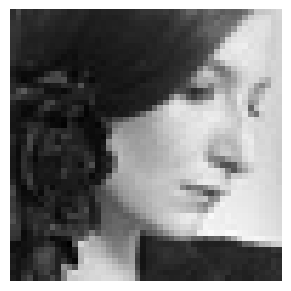

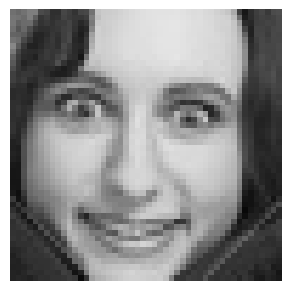

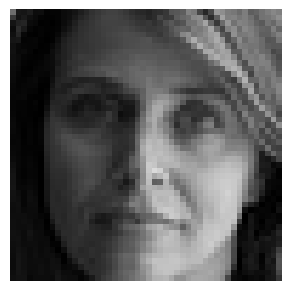

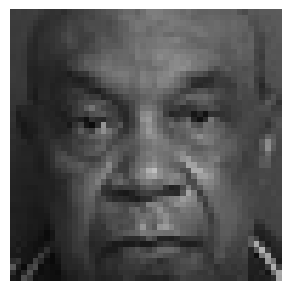

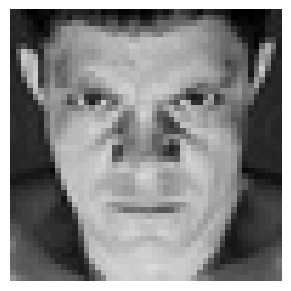

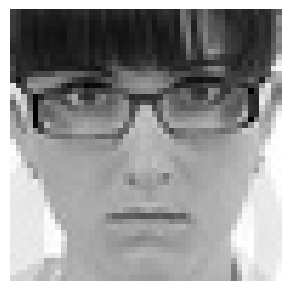

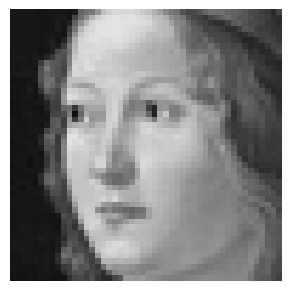

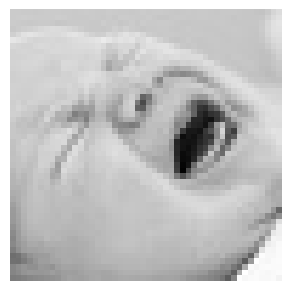

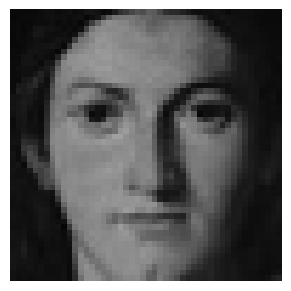

In [2]:
images = glob("train/**/**")
for i in range(9): 
    image = random.choice(images)
    plt.figure(figsize = (12,12))
    plt.subplot(331)
    plt.imshow(cv2.imread(image));plt.axis('off')

**Preparing data for training**

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

datagen_test = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


*Defining Model*

In [4]:
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Dense, Flatten, Input
from keras.models import Model
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x


def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)

    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = inputs,outputs = output)

    model.compile(loss = ['categorical_crossentropy'],optimizer = 'adam', metrics = ['accuracy'])

    return model

model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0  

**Initializing the model**

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor = 'val_accuracy',
                            save_weights_only = True, mode= 'max',verbose = 1)
callbacks = [checkpoint]

## Training the model

In [9]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data =validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.3898 - accuracy: 0.4694
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 122s 273ms/step - loss: 1.3898 - accuracy: 0.4694 - val_loss: 1.3367 - val_accuracy: 0.4778
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.2732 - accuracy: 0.5146
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 125s 279ms/step - loss: 1.2732 - accuracy: 0.5146 - val_loss: 1.3655 - val_accuracy: 0.4914
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1967 - accuracy: 0.5450
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 128s 286ms/step - loss: 1.1967 - accuracy: 0.5450 - val_loss: 1.3064 - val_accuracy: 0.5025
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.1420 - accuracy: 0.5681
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 

**Model Evaluation**

In [10]:
model.evaluate(validation_generator)

113/113 [==============================] - 13s 118ms/step - loss: 1.0937 - accuracy: 0.6130


[1.093704342842102, 0.6129841208457947]

**Plotting loss**

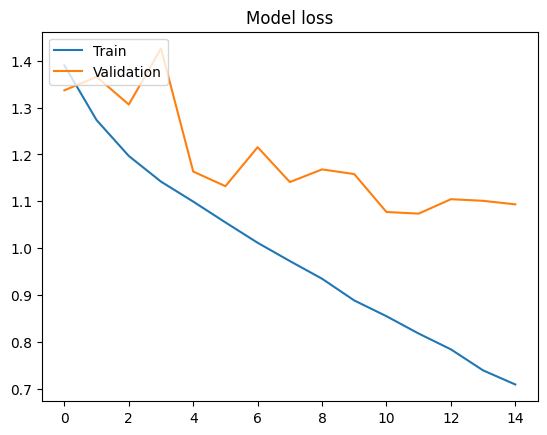

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train','Validation'],loc = 'upper left')
# plt.subplot_adjust(top=1.0,bottom=0.0,right=-0.95,left=0.0,hspace=0.25,wspace=0.35)

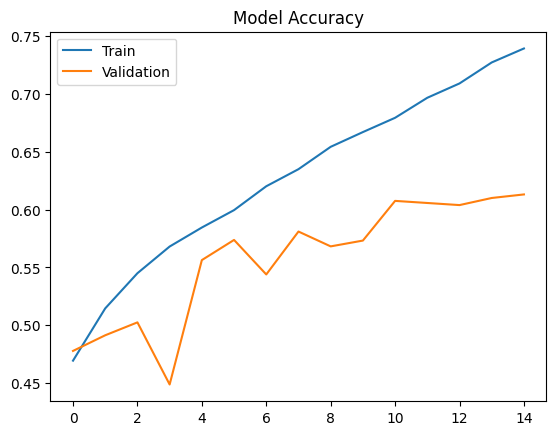

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
# plt.subplot_adjust(top=1.0,bottom=0.0,right=-0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving model**

In [18]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)